# Welcome to an example Binder

We need `seaborn`, which shall be included it in `requirements.txt` file

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel('datasets/mic.xlsx',
                  engine = 'openpyxl')
df.head(2)

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Overal satisfaction,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend
0,31 - 40,Male,Research,">40, 000",5,5,5,4,4,5,...,4,4,Taste,No,NaN,"vanilla, lemon, and mint",Chocolate,More than one flavoured,agree,agree
1,21 - 30,Male,student,"<10,000",3,5,3,4,5,5,...,4,4,Taste,No,Quanity issues,"vanilla, chocolate, and strawberry",Chocolate,More than one flavoured,neutral,neutral


In [4]:
counts = df['Age'].value_counts()
counts

counts = counts.to_frame()
counts

,Age
21 - 30,37
<=20,6
31 - 40,4
41 - 50,3


In [5]:
counts['Porcentaje'] = (counts.loc[:,'Age' ]) / counts.loc[:,'Age'].sum(axis = 0) * 100
counts

counts.reset_index(inplace = True)
counts.rename({"index" : 'Age_group'},
                    axis = 1,
                    inplace = True)
counts

,Age_group,Age,Porcentaje
0,21 - 30,37,74.0
1,<=20,6,12.0
2,31 - 40,4,8.0
3,41 - 50,3,6.0


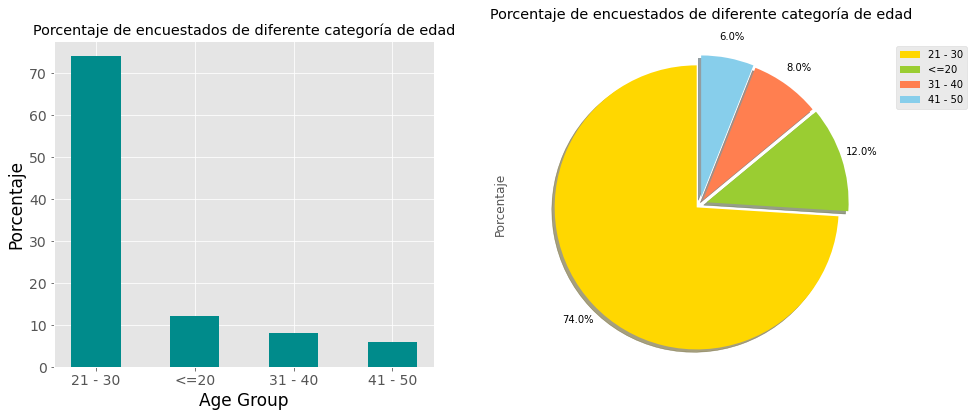

In [6]:
x = list(counts['Age_group'])
y = list(counts['Porcentaje'])

mpl.style.use('ggplot')

plt.subplot(1,2,1)
plt.rcParams['figure.figsize'] = (15, 7)
plt.bar(x, y,
       width = 0.5,
       color = 'darkcyan')

plt.title('Porcentaje de encuestados de diferente categoría de edad')
plt.xlabel('Age Group', fontweight = 'regular', color = 'black', fontsize = 17, horizontalalignment = 'center')
plt.ylabel('Porcentaje', fontweight = 'regular', color = 'black', fontsize = 17, horizontalalignment = 'center')

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.subplot(1,2,2)
plt.rcParams['figure.figsize'] = (15,7)
fav_colors = ['gold', 'yellowgreen', 'coral', 'skyblue', 'lightgreen', 'pink']
exp_distance = [0.03, 0.05, 0.04, 0.05]

counts['Porcentaje'].plot(kind = 'pie',
                      figsize = (15, 6),
                      autopct = '%1.1f%%',
                      colors = fav_colors,
                      startangle = 90,
                      pctdistance = 1.15,
                      labels = None,
                      explode = exp_distance,
                      shadow = True)

plt.title('Porcentaje de encuestados de diferente categoría de edad', y = 1.05)
plt.axis('equal')
plt.legend(labels = counts.Age_group, bbox_to_anchor = (1.0, 1.0))
plt.savefig('age_group.png')
plt.show()

In [10]:
df.groupby(['Age','Sex']).size()

Age      Sex   
21 - 30  Female    15
         Male      22
31 - 40  Female     2
         Male       2
41 - 50  Female     2
         Male       1
<=20     Female     3
         Male       3
dtype: int64